In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,dct
import librosa
from scipy import signal
import soundfile as sf

### 1. Mel filterbank (1 point)

#### a) Load the given audio file

In [4]:
audio_file = 'audio.wav'
s, sr = librosa.load(audio_file, sr=None)

#### b) Create a mel filterbank using librosa

In [5]:
n_fft=512
n_mel = 40
# mel filterbank
mel_filter = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mel)



#### c) Plot the mel filterbank

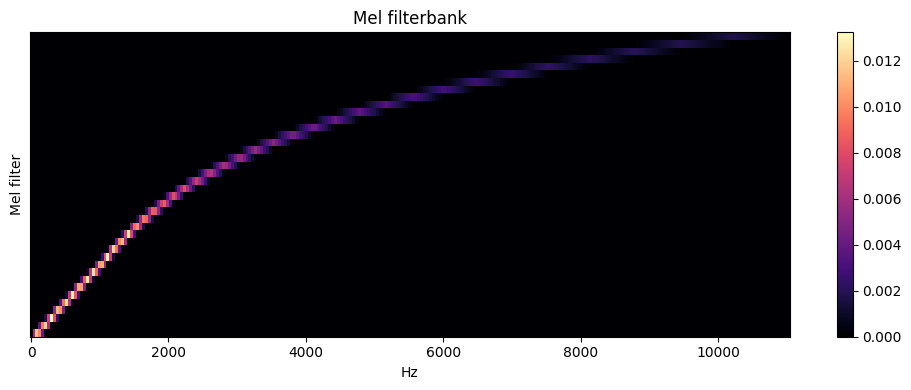

In [6]:
#plot the mel filterbank
plt.figure(figsize=(10, 4))
plt.subplot(1, 1, 1)
librosa.display.specshow(mel_filter, x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filterbank')
plt.colorbar()
plt.tight_layout()
plt.show()


#### Report your observations

In [ ]:
#Mel scale is focused on human-frequencies, so focuses on lower frequencies.
#Also, the curve shape shows that mel scale is a noninear relation to frequency

### 2. MFCC (1 point)

#### a) Pre-emphasis the audio signal

In [7]:
pre_emphasis = 0.97
s_ = np.append(s[0], s[1:] - pre_emphasis * s[:-1])

#### b) Implement a stft loop for each frame 

In [8]:
n_frames= int(np.ceil(len(s_)/n_fft))
power_spectro = np.zeros((n_fft//2+1,n_frames),dtype=np.float32)
mel_spectro = np.zeros((n_mel,n_frames),dtype=np.float32)
mfccs = np.zeros((n_mel,n_frames),dtype=np.float32)
log_mel_spectro = np.zeros((n_mel,n_frames),dtype=np.float32)

for i in np.arange(0,n_frames):   
    s_seg = s_[i*n_fft//2:i*n_fft//2+n_fft] # Segmentation
    s_win_seg = s_seg * np.hamming(n_fft) # Window each frame using hamming window    
    spectrum  = np.abs(fft(s_win_seg)) # Calculate fft
    spectrum=spectrum[:n_fft//2+1] 
    power_spectrum = np.square(spectrum) # Collect the power spectrum
    power_spectro[:,i] = power_spectrum
    # Multiply it with the mel filterbank 
    mel_spectrum = np.dot(mel_filter,power_spectrum)
    mel_spectro[:,i] = mel_spectrum
    
    log_mel_spectrum = 20 * np.log10(max(np.maximum(mel_spectrum, 1e-10))) # Take log operation
    log_mel_spectro[:,i] = log_mel_spectrum
    
    #apply DCT
    # Compute MFCCs from the log Mel spectrogram


log_mel_spectrogram2 = librosa.power_to_db(mel_spectro, ref=np.max)
mfccs = librosa.feature.mfcc(S=log_mel_spectrogram2, sr=sr, n_mfcc=13)
   




#### c.1) Plot logarithmic power spectrogram

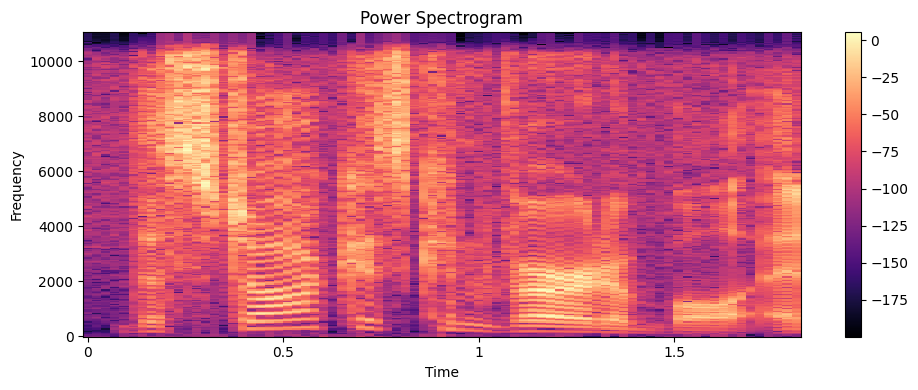

In [9]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 1, 1)
librosa.display.specshow(20 * np.log10(power_spectro + 1e-10), x_axis='time', y_axis='linear')
plt.ylabel('Frequency')
plt.title('Power Spectrogram')
plt.colorbar()
plt.tight_layout()
plt.show()

#### c.2) Plot mel spectrogram

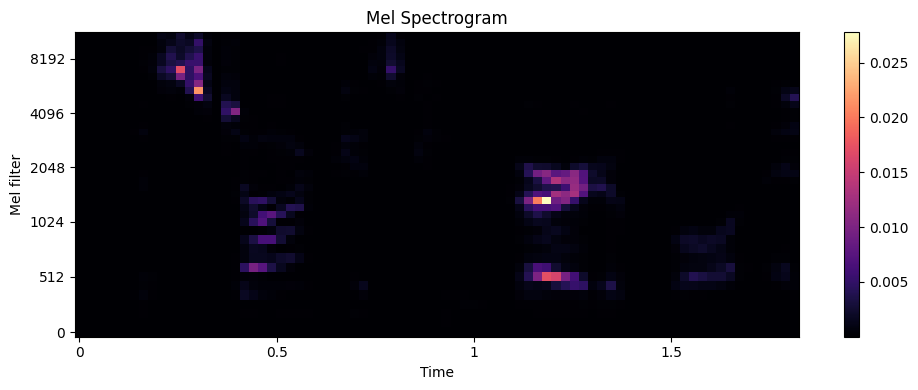

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 1, 1)
librosa.display.specshow(mel_spectro, x_axis='time', y_axis='mel')
plt.ylabel('Mel filter')
plt.title('Mel Spectrogram')
plt.colorbar()
plt.tight_layout()
plt.show()


#### c.3) Plot logarithmic mel spectrogram

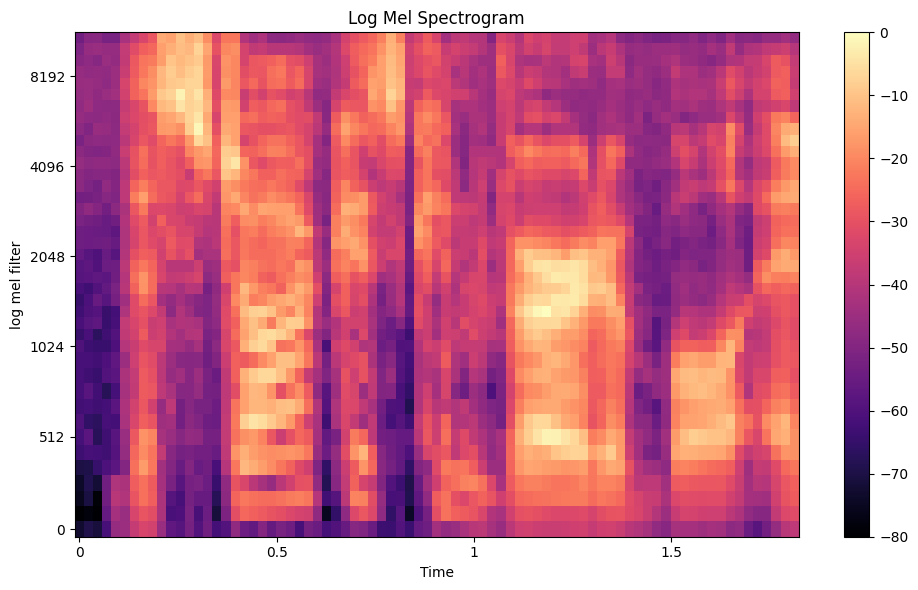

In [11]:
plt.figure(figsize=(10, 6))
#plt.subplot(1, 1, 1)

librosa.display.specshow(log_mel_spectrogram2, x_axis='time',y_axis='mel')
plt.ylabel('log mel filter')
plt.title('Log Mel Spectrogram')
plt.colorbar()
plt.tight_layout()
plt.show()


#### c.4) Plot MFCC

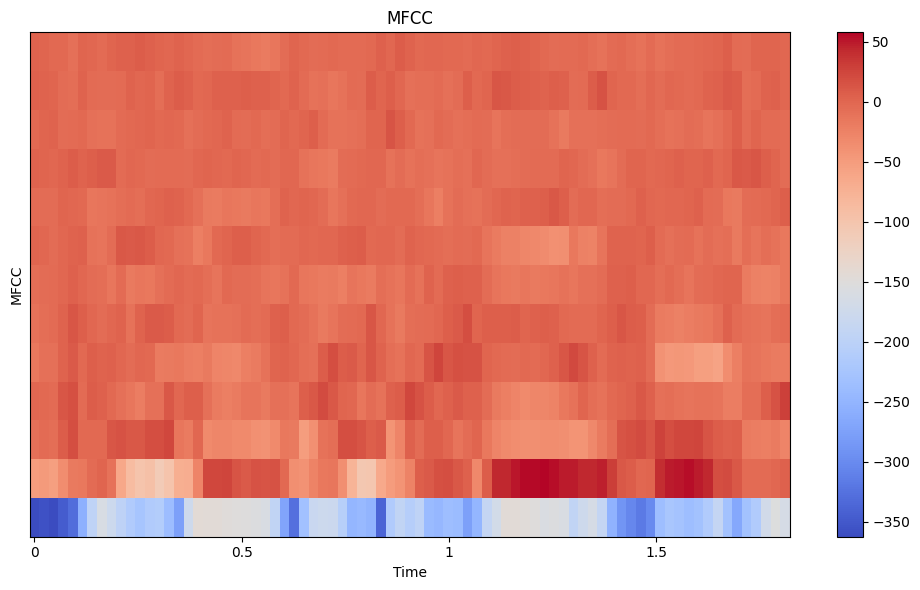

In [12]:

plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.ylabel('MFCC')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
plt.show()


#### d) Implement MFCC using librosa

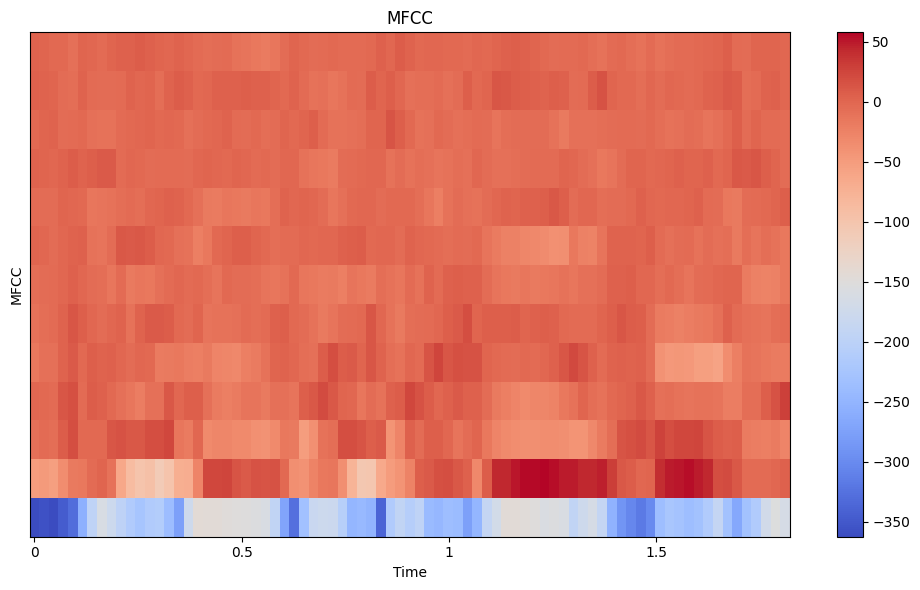

In [13]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.ylabel('MFCC')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
plt.show()

#### Report your observations

### Bonus problem: Implement your own mel filterbank.